## 자동차 가격 예측
#### input : carlength carwidth carheight 
#### target : price

#### https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset

### 오답 노트 확인 다시한번 하기!!!
train_input = train_input.reshape(-1, 3) # !@# reshape (마지막행, 특성(개수))

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
carpriceprediction_data = pd.read_csv(r'C:\Users\user\Downloads\CarPrice_Assignment.csv')

In [13]:
car_length = carpriceprediction_data['carlength'].to_numpy()
car_width = carpriceprediction_data['carwidth'].to_numpy()
car_height = carpriceprediction_data['carheight'].to_numpy()
car_target = carpriceprediction_data['price'].to_numpy()

In [14]:
car_target

array([13495.   , 16500.   , 16500.   , 13950.   , 17450.   , 15250.   ,
       17710.   , 18920.   , 23875.   , 17859.167, 16430.   , 16925.   ,
       20970.   , 21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,
        5151.   ,  6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,
        6229.   ,  6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,
        6479.   ,  6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,
        7295.   ,  7895.   ,  9095.   ,  8845.   , 10295.   , 12945.   ,
       10345.   ,  6785.   ,  8916.5  ,  8916.5  , 11048.   , 32250.   ,
       35550.   , 36000.   ,  5195.   ,  6095.   ,  6795.   ,  6695.   ,
        7395.   , 10945.   , 11845.   , 13645.   , 15645.   ,  8845.   ,
        8495.   , 10595.   , 10245.   , 10795.   , 11245.   , 18280.   ,
       18344.   , 25552.   , 28248.   , 28176.   , 31600.   , 34184.   ,
       35056.   , 40960.   , 45400.   , 16503.   ,  5389.   ,  6189.   ,
        6669.   ,  7689.   ,  9959.   ,  8499.   , 

In [ ]:
## 목표 3개의 특성을 한 경우

In [21]:
car_data = np.column_stack((car_length, car_width, car_height))

In [23]:
print(car_data[:5])

[[168.8  64.1  48.8]
 [168.8  64.1  48.8]
 [171.2  65.5  52.4]
 [176.6  66.2  54.3]
 [176.6  66.4  54.3]]


In [155]:
from sklearn.model_selection import train_test_split

In [156]:
train_input, test_input, train_target, test_target = train_test_split(
    car_data, car_target, random_state=99)

In [157]:
print(train_input.shape, test_input.shape)

(153, 3) (52, 3)


In [158]:
test_array = np.array([1,2,3,4,5,6])
print(test_array.shape)

(6,)


In [159]:
test_array = test_array.reshape(3, 2)
print(test_array.shape)

(3, 2)


In [160]:
train_input = train_input.reshape(-1, 3) # !@# reshape (마지막행, 특성(개수))
test_input = test_input.reshape(-1, 3)

In [161]:
print(train_input.shape, test_input.shape)

(153, 3) (52, 3)


In [66]:
# 회귀분석 - 결정계수

In [67]:
from sklearn.neighbors import KNeighborsRegressor

In [68]:
# 중간 TIP # 규제는 과적합일 때만 사용 한다.

In [69]:
print(train_input.shape,
      train_target.shape)

(153, 3) (153,)


In [70]:
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [93]:
knr.score(test_input, test_target)

0.7227044325721019

In [ ]:
# 절대값 오차 계산

In [94]:
from sklearn.metrics import mean_absolute_error

In [96]:
test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

2687.272438461538


In [97]:
print(knr.score(train_input, train_target))

0.6044152768463555


In [98]:
# 이결과로 knr은 안좋은 결과값을 같는다.

In [105]:
# 이웃의 갯수를 작게 설정해보기
knr.n_neighbors = 3
# 모델을 다시 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.8855130117630373


In [107]:
print(knr.score(test_input, test_target))

0.59463932115816


In [ ]:
# (p13 시작~ 17까지 생략)

In [121]:
print(train_input)

[[192.7  71.4  55.9]
 [188.8  67.2  57.5]
 [173.6  65.4  54.9]
 [192.7  71.4  55.7]
 [169.7  63.6  59.1]
 [173.5  65.4  53. ]
 [168.9  65.   51.6]
 [172.   65.4  52.5]
 [184.6  66.5  56.1]
 [168.7  64.   52.6]
 [144.6  63.9  50.8]
 [175.6  66.5  54.9]
 [175.6  66.5  53.9]
 [169.   65.7  49.6]
 [157.3  63.8  50.8]
 [159.3  64.2  55.6]
 [171.7  65.5  55.7]
 [186.7  68.4  56.7]
 [157.3  63.8  50.8]
 [190.9  70.3  56.5]
 [189.   66.9  55.7]
 [172.4  65.4  51.6]
 [183.5  67.7  52. ]
 [186.6  66.5  56.1]
 [150.   64.   52.6]
 [202.6  71.7  56.3]
 [165.7  64.   51.4]
 [199.2  72.   55.4]
 [171.7  65.5  55.7]
 [171.7  65.5  55.7]
 [157.3  63.8  50.6]
 [186.7  68.4  56.7]
 [171.2  65.5  52.4]
 [177.8  66.5  53.7]
 [166.3  64.4  52.8]
 [141.1  60.3  53.2]
 [167.5  65.2  53.3]
 [186.6  66.5  56.1]
 [176.2  65.6  52. ]
 [157.3  63.8  50.6]
 [186.6  66.5  56.1]
 [176.8  64.8  54.3]
 [157.3  63.8  50.6]
 [186.7  68.4  56.7]
 [176.8  64.8  54.3]
 [183.5  67.7  52. ]
 [166.3  64.4  52.8]
 [172.   65.4

In [151]:
# # k 최근접 이웃 회귀 객체를 만듭니다.
# knr = KNeighborsRegressor()
# # 5~ 45까지 x 좌표를 만듭니다.
# x = np.arange(5, 45).reshape(-1, 1)

# # n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.ㅇ
# for n in [1, 5, 10]:
#     #모델 훈련
#     knr.n_neighbors = n
#     knr.fit(train_input, train_target)
#     # 지정한 범위 x에 대한 예측 구하기
#     prediction = knr.predict(x)
#     # 훈련 세트와 예측 경로가 그래프 그리기
#     plt.scatter(train_input, train_target)
#     plt.plot(x, prediction)
#     plt.title('n_neighbors = {}'.format(n))
#     plt.xlabel('carlength') # + carheight
#     plt.ylabel('carwidth')
#     # //plt.zlabel('carheight') # 2개의 특성을 한 경우
#     plt.show()

In [110]:
# p18 위에꺼 해야됨 pass
# distances, indexes = knr.kneighbors([[50]])

# plt.scatter(train_input, train_target)
# # plt.scatter(car_length, car_width) #, car_height)

# plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# plt.scatter(50, 1033, marker='^')
# plt.xlabel('carlength') # + carheight
# plt.ylabel('carwidth')
# # //plt.zlabel('carheight') # 2개의 특성을 한 경우
# plt.show()

In [ ]:
# 위에는 knn

### 선형회귀 모델 훈련 시작

In [162]:
from sklearn.linear_model import LinearRegression

In [163]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [114]:
# print(lr.predict([[50]])) // 농어 크기 50 100 비교 기때문에 x

In [ ]:
# p 26 부터 시작

In [167]:
print(lr.coef_, lr.intercept_) #

[ 207.6025082  1920.5038427  -661.02929228] -113816.47004844395


In [178]:
# # 훈련 세트의 산점도를 그립니다.
# plt.scatter(train_input, train_target)
# # 45에서 200까지 1차 방정식 그래프를 그립니다.
# plt.plot([45, 200], [45*lr.coef_+lr.intercept_, 200*lr.coef_+lr.intercept_])
# # 차 데이터
# plt.scatter(50, 250.8, marker='^')
# plt.xlabel('carlength')
# plt.ylabel('carweight')
# plt.show()
# # 3개에서! 문제 생김

In [176]:
train_target.shape

(153,)

In [171]:
type(lr.coef_)

numpy.ndarray

In [166]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.5831852999642824
0.6702057130633738


In [179]:
# ( p 40 부터 시작 )

In [180]:
from sklearn.preprocessing import PolynomialFeatures

In [181]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [182]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

In [183]:
print(train_poly.shape)

(153, 9)


In [184]:
poly.get_feature_names_out() # 이런식으로 나온다.

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [185]:
test_poly = poly.transform(test_input)

In [187]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.6482382845430817


In [188]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [191]:
print(train_input.shape)

(153, 3)


In [192]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.7664377410826385


In [193]:
print(lr.score(test_poly, test_target))

-843.5667659525963


In [ ]:
# test 값이 -843 규제 를 사용한다.

In [ ]:
# 모델 규제 시작

In [194]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [196]:
train_scaled

array([[ 1.46000326,  2.49312444,  0.84201247, ...,  1.71983438,
         1.2194025 ,  0.79686285],
       [ 1.15448548,  0.56731393,  1.49430568, ...,  1.45067342,
         1.55723025,  1.57968841],
       [-0.03625048, -0.25803343,  0.43432922, ...,  0.18223429,
         0.28842906,  0.35105296],
       ...,
       [-0.18509247, -0.2121808 ,  0.76047582, ...,  0.46538028,
         0.61681299,  0.70511213],
       [-0.83529697, -0.89997027,  0.27125592, ..., -0.19369981,
         0.02217464,  0.18159546],
       [ 0.1282591 ,  2.90579812, -1.3594771 , ..., -0.10825899,
        -0.83057126, -1.26050659]])

## Ridge 릿지 사용기기

In [197]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.6440367349448899


In [198]:
print(ridge.score(test_scaled, test_target))

0.7224245419451071


In [199]:
# 시각화 패키지 plt
train_score = []
test_score = []

In [200]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:

    ridge = Ridge(alpha=alpha)

    ridge.fit(train_scaled, train_target)

    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

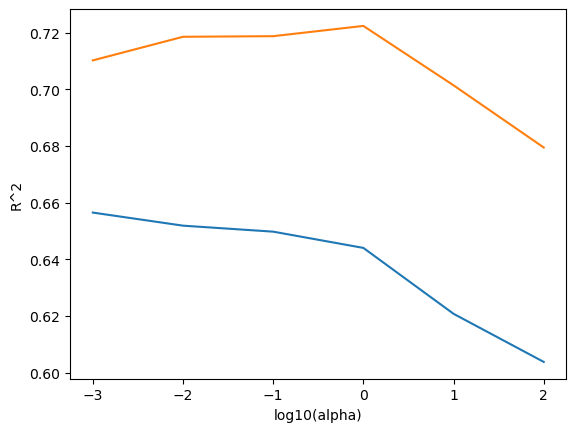

In [201]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('log10(alpha)')
plt.ylabel('R^2')
plt.show()

In [202]:
ridge = Ridge(alpha=0.1)  # 릿지라고 모델이 따로 있는게 아니다.
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.6497749734104323
0.718805182607067


# 라쏘 사용기기

In [203]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.6490798636948338


D:\ANACONDA3_ENVS\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.086e+09, tolerance: 9.533e+05
  model = cd_fast.enet_coordinate_descent(


In [204]:
print(lasso.score(test_scaled, test_target))

0.7174781358868361


D:\ANACONDA3_ENVS\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.660e+09, tolerance: 9.533e+05
  model = cd_fast.enet_coordinate_descent(
D:\ANACONDA3_ENVS\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.632e+09, tolerance: 9.533e+05
  model = cd_fast.enet_coordinate_descent(
D:\ANACONDA3_ENVS\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.350e+09, tolerance: 9.533e+05

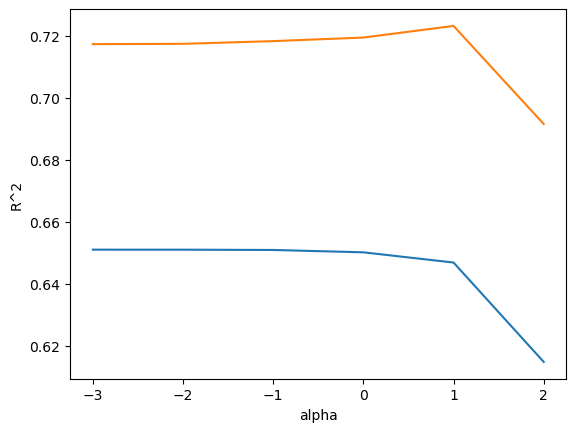

In [205]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:

    lasso = Lasso(alpha=alpha, max_iter=10000)

    lasso.fit(train_scaled, train_target)

    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
    
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# 과적값이 있다는 전제하에 실행
# 과적값과 과소적합의 어느지점의 알파값을 찾는데 목표로 한다.

In [206]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.6464888763815657
0.721481754358604


D:\ANACONDA3_ENVS\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.930e+07, tolerance: 9.533e+05
  model = cd_fast.enet_coordinate_descent(


In [207]:
print(np.sum(lasso.coef_ == 0))
# 205개 중에 29개를 삭제하고 나머지 176개로 0.64648의 결정계수를 만들었다.

29
